In [141]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark")
from read_xlsx import *
from pathlib import Path

Path("./plots").mkdir(parents=True, exist_ok=True)


def groupedBarPlot(df, plotParams, legendParams, isHorizontal=False, savedFig=True):
    plt.figure(figsize=(15, 7))
    g = sns.barplot(x=plotParams["x"],
                    y=plotParams["y"],
                    hue=plotParams["hue"],
                    data=df,
                    ci="sd")

    for p in g.patches:
        if isHorizontal:
            g.annotate(format(p.get_width()),
                   xy = (p.get_width(), p.get_y() + p.get_height() / 2),
                   ha='left', va='center',
                   xytext=(9, 0),
                   textcoords='offset points')
        else:
            g.annotate(format(p.get_height()),
                       xy = (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')

    plt.legend(bbox_to_anchor=(1.04, 0.5), loc=legendParams["location"], borderaxespad=0, title=legendParams["title"])
    plt.subplots_adjust(right=0.7)
    plt.title(plotParams["title"])
    plt.xlabel(plotParams["xLabel"])
    plt.ylabel(plotParams["yLabel"])
    gridAxis = "x" if isHorizontal else "y"
    plt.grid(axis=gridAxis)
    
    if savedFig:
        plt.savefig("./plots/" + plotParams["title"] + ".png", dpi=300)
    plt.show()

##  The number of student’s learning behavior (during COVID-19) with parameter (Gender)

In [142]:
datasetBasedGender = feature_group_by_("Gender",["Male","Female","Not public"])

        Gender             Learning hours  Total  Mean  Std.Deviation  \
0         Male               Total Online      0  2.77          3.119   
1         Male              Total Offline      0  2.95          3.176   
2         Male     Hours with instruction      0  1.61          2.481   
3         Male  Hours without instruction      0  4.11          4.811   
4       Female               Total Online      0  2.60          3.054   
5       Female              Total Offline      0  2.90          2.446   
6       Female     Hours with instruction      0  1.07          1.638   
7       Female  Hours without instruction      0  4.43          4.158   
8   Not public               Total Online      0  4.27          5.079   
9   Not public              Total Offline      0  3.33          4.077   
10  Not public     Hours with instruction      0  2.60          3.422   
11  Not public  Hours without instruction      0  5.00          3.724   

    Lower Bound  Upper Bound  Min  Max  
0        

In [143]:
datasetBasedGender.head()

Gender             Learning hours  Total  Mean  Std.Deviation  Lower Bound  \
0    Male               Total Online      0  2.77          3.119         2.29   
1    Male              Total Offline      0  2.95          3.176         2.46   
2    Male     Hours with instruction      0  1.61          2.481         1.23   
3    Male  Hours without instruction      0  4.11          4.811         3.37   
4  Female               Total Online      0  2.60          3.054         2.21   

   Upper Bound  Min  Max  
0         3.25    0   21  
1         3.43    0   21  
2         1.99    0   20  
3         4.85    0   42  
4         2.99    0   30

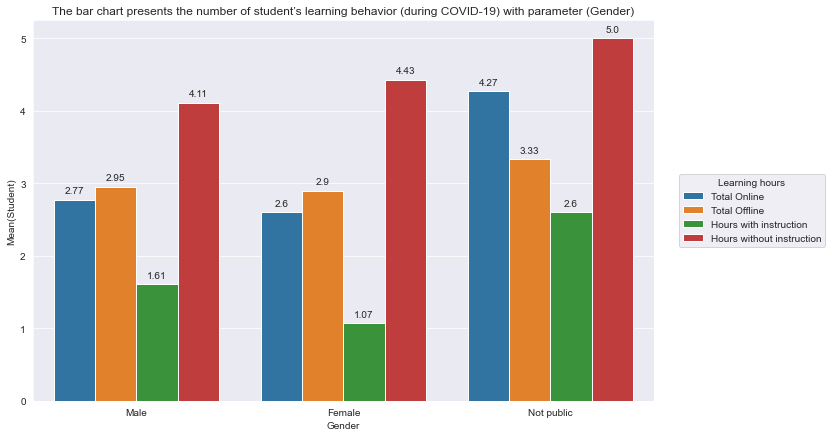

In [144]:
groupedBarPlot(datasetBasedGender,
               plotParams={
                   "x": "Gender",
                   "y": "Mean",
                   "hue": "Learning hours",
                   "title": "The bar chart presents the number of student’s learning behavior (during COVID-19) with parameter (Gender)",
                   "xLabel": "Gender",
                   "yLabel": "Mean(Student)"
               },
               legendParams={
                   "location": "center left",
                   "title": "Learning hours"
               })

##  Number of student’s learning behavior (duringCOVID-19) with parameter (School type)

In [145]:
datasetBasedSchoolType = feature_group_by_("school_type", ["Public school (normal)", "Public school (Gifted)", "Private school (normal)",
                                  "International school"])

                school_type             Learning hours  Total  Mean  \
0    Public school (normal)               Total Online      0  2.33   
1    Public school (normal)              Total Offline      0  2.77   
2    Public school (normal)     Hours with instruction      0  1.30   
3    Public school (normal)  Hours without instruction      0  3.81   
4    Public school (Gifted)               Total Online      0  2.67   
5    Public school (Gifted)              Total Offline      0  3.17   
6    Public school (Gifted)     Hours with instruction      0  0.80   
7    Public school (Gifted)  Hours without instruction      0  5.04   
8   Private school (normal)               Total Online      0  3.65   
9   Private school (normal)              Total Offline      0  3.01   
10  Private school (normal)     Hours with instruction      0  2.11   
11  Private school (normal)  Hours without instruction      0  4.55   
12     International school               Total Online      0  2.00   
13    

In [146]:
datasetBasedSchoolType.head()

school_type             Learning hours  Total  Mean  \
0  Public school (normal)               Total Online      0  2.33   
1  Public school (normal)              Total Offline      0  2.77   
2  Public school (normal)     Hours with instruction      0  1.30   
3  Public school (normal)  Hours without instruction      0  3.81   
4  Public school (Gifted)               Total Online      0  2.67   

   Std.Deviation  Lower Bound  Upper Bound  Min  Max  
0          2.623         1.95         2.71    0   20  
1          2.785         2.37         3.18    0   20  
2          2.196         0.98         1.61    0   20  
3          3.255         3.34         4.28    0   20  
4          3.137         2.12         3.21    0   18

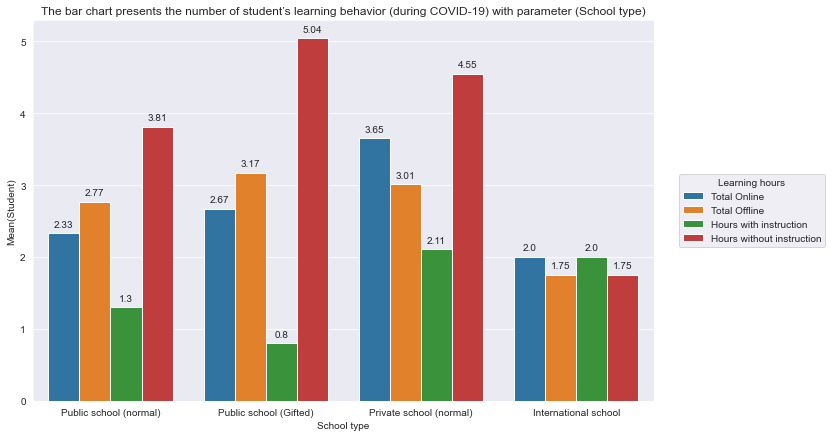

In [147]:
groupedBarPlot(datasetBasedSchoolType,
               plotParams={
                   "x": "school_type",
                   "y": "Mean",
                   "hue": "Learning hours",
                   "title": "The bar chart presents the number of student’s learning behavior (during COVID-19) with parameter (School type)",
                   "xLabel": "School type",
                   "yLabel": "Mean(Student)"
               },
               legendParams={
                   "location": "center left",
                   "title": "Learning hours"
               })

##  Number of student’s learning behavior (duringCOVID-19) with parameter (Family income)

In [148]:
datasetBasedFamilyIncome = feature_group_by_("income", ["Less than 430 USD",
                             "From 430 to under 860 USD",
                             "From 860 to under 1,290 USD",
                             "From 1,290 to under 1,720 USD",
                             "From 1,720 to under 2,150 USD",
                             "More than 2,150 USD"])

                           income             Learning hours  Total  Mean  \
0               Less than 430 USD               Total Online      0  2.44   
1               Less than 430 USD              Total Offline      0  3.06   
2               Less than 430 USD     Hours with instruction      0  1.37   
3               Less than 430 USD  Hours without instruction      0  4.13   
4       From 430 to under 860 USD               Total Online      0  2.20   
5       From 430 to under 860 USD              Total Offline      0  2.74   
6       From 430 to under 860 USD     Hours with instruction      0  1.13   
7       From 430 to under 860 USD  Hours without instruction      0  3.80   
8     From 860 to under 1,290 USD               Total Online      0  3.06   
9     From 860 to under 1,290 USD              Total Offline      0  3.00   
10    From 860 to under 1,290 USD     Hours with instruction      0  1.42   
11    From 860 to under 1,290 USD  Hours without instruction      0  4.64   

In [149]:
datasetBasedFamilyIncome.head()

income             Learning hours  Total  Mean  \
0          Less than 430 USD               Total Online      0  2.44   
1          Less than 430 USD              Total Offline      0  3.06   
2          Less than 430 USD     Hours with instruction      0  1.37   
3          Less than 430 USD  Hours without instruction      0  4.13   
4  From 430 to under 860 USD               Total Online      0  2.20   

   Std.Deviation  Lower Bound  Upper Bound  Min  Max  
0          2.152         1.88         2.99    0    8  
1          2.552         2.41         3.72    0   11  
2          1.920         0.88         1.86    0    8  
3          3.517         3.23         5.03    0   16  
4          2.190         1.83         2.56    0   10

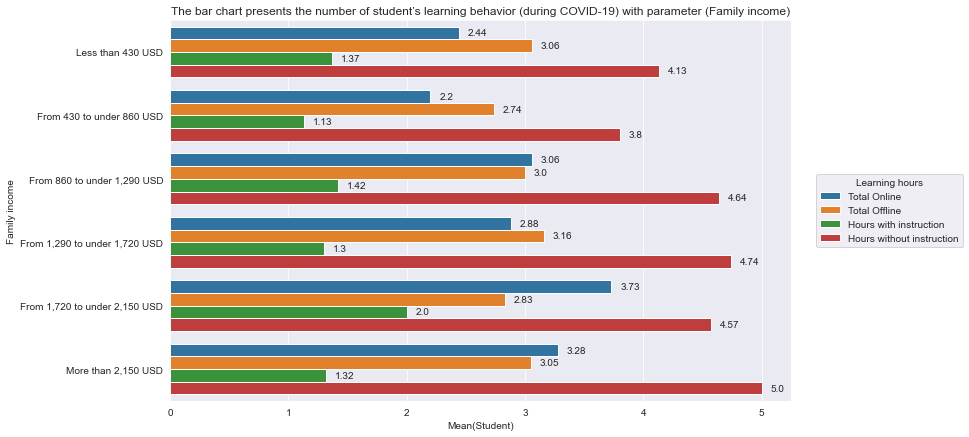

In [150]:
groupedBarPlot(datasetBasedFamilyIncome,
               plotParams={
                   "x": "Mean",
                   "y": "income",
                   "hue": "Learning hours",
                   "title": "The bar chart presents the number of student’s learning behavior (during COVID-19) with parameter (Family income)",
                   "xLabel": "Mean(Student)",
                   "yLabel": "Family income"
               },
               legendParams={
                   "location": "center left",
                   "title": "Learning hours"
               },
               isHorizontal=True
              )

##  Number of student’s learning behavior (during COVID-19) with parameter (Learning hours at home before COVID-19)

In [151]:
datasetLHBeforeCovid = feature_group_by_("Lh_before_Cov", ["under 4h", "from 4 to 7h", "over 7h"])

   Lh_before_Cov             Learning hours  Total  Mean  Std.Deviation  \
0       under 4h               Total Online      0  2.11          2.796   
1       under 4h              Total Offline      0  2.45          2.474   
2       under 4h     Hours with instruction      0  1.11          1.682   
3       under 4h  Hours without instruction      0  3.44          3.928   
4   from 4 to 7h               Total Online      0  4.18          3.159   
5   from 4 to 7h              Total Offline      0  4.08          2.803   
6   from 4 to 7h     Hours with instruction      0  1.72          2.240   
7   from 4 to 7h  Hours without instruction      0  6.54          4.391   
8        over 7h               Total Online      0  6.60          4.910   
9        over 7h              Total Offline      0  6.00          5.033   
10       over 7h     Hours with instruction      0  3.67          5.362   
11       over 7h  Hours without instruction      0  8.93          6.191   

    Lower Bound  Upper B

In [152]:
datasetLHBeforeCovid.head()

Lh_before_Cov             Learning hours  Total  Mean  Std.Deviation  \
0      under 4h               Total Online      0  2.11          2.796   
1      under 4h              Total Offline      0  2.45          2.474   
2      under 4h     Hours with instruction      0  1.11          1.682   
3      under 4h  Hours without instruction      0  3.44          3.928   
4  from 4 to 7h               Total Online      0  4.18          3.159   

   Lower Bound  Upper Bound  Min  Max  
0         1.79         2.42    0   30  
1         2.17         2.72    0   21  
2         0.92         1.30    0   12  
3         3.00         3.88    0   42  
4         3.53         4.84    0   12

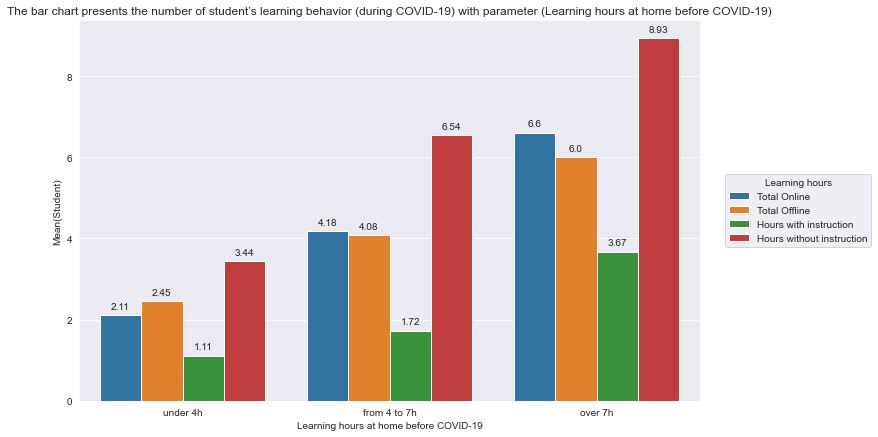

In [153]:
groupedBarPlot(datasetLHBeforeCovid,
               plotParams={
                   "x": "Lh_before_Cov",
                   "y": "Mean",
                   "hue": "Learning hours",
                   "title": "The bar chart presents the number of student’s learning behavior (during COVID-19) with parameter (Learning hours at home before COVID-19)",
                   "xLabel": "Learning hours at home before COVID-19",
                   "yLabel": "Mean(Student)"
               },
               legendParams={
                   "location": "center left",
                   "title": "Learning hours"
               })

##  Number of student’s learning behavior (during COVID-19) with parameter (Learning hours at home during COVID-19)

In [154]:
datasetLHInCovid = feature_group_by_("Lh_in_Cov", ["under 4h", "from 4 to 7h", "over 7h"])

       Lh_in_Cov             Learning hours  Total  Mean  Std.Deviation  \
0       under 4h               Total Online      0  1.60          2.732   
1       under 4h              Total Offline      0  1.99          2.371   
2       under 4h     Hours with instruction      0  0.90          1.464   
3       under 4h  Hours without instruction      0  2.69          3.870   
4   from 4 to 7h               Total Online      0  3.36          2.361   
5   from 4 to 7h              Total Offline      0  3.34          2.042   
6   from 4 to 7h     Hours with instruction      0  1.59          1.971   
7   from 4 to 7h  Hours without instruction      0  5.11          2.722   
8        over 7h               Total Online      0  6.04          4.149   
9        over 7h              Total Offline      0  6.06          3.857   
10       over 7h     Hours with instruction      0  2.59          3.769   
11       over 7h  Hours without instruction      0  9.51          5.713   

    Lower Bound  Upper B

In [155]:
datasetLHInCovid.head()

Lh_in_Cov             Learning hours  Total  Mean  Std.Deviation  \
0      under 4h               Total Online      0  1.60          2.732   
1      under 4h              Total Offline      0  1.99          2.371   
2      under 4h     Hours with instruction      0  0.90          1.464   
3      under 4h  Hours without instruction      0  2.69          3.870   
4  from 4 to 7h               Total Online      0  3.36          2.361   

   Lower Bound  Upper Bound  Min  Max  
0         1.25         1.96    0   30  
1         1.68         2.30    0   21  
2         0.71         1.09    0    9  
3         2.18         3.19    0   42  
4         2.96         3.75    0   18

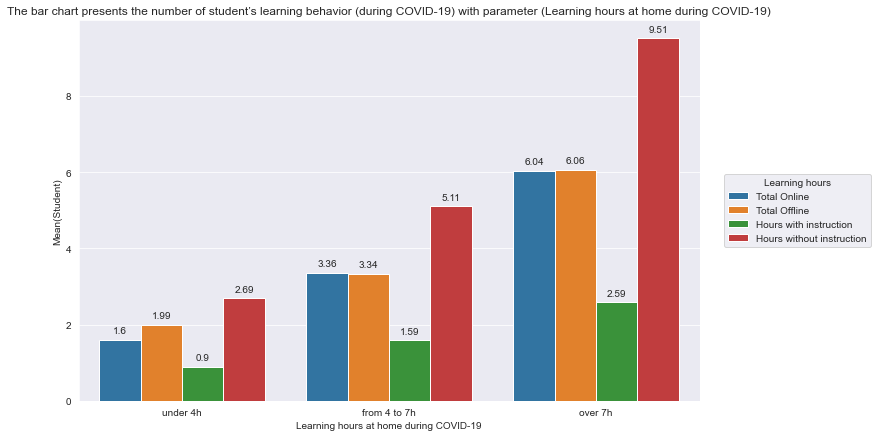

In [156]:
groupedBarPlot(datasetLHInCovid,
               plotParams={
                   "x": "Lh_in_Cov",
                   "y": "Mean",
                   "hue": "Learning hours",
                   "title": "The bar chart presents the number of student’s learning behavior (during COVID-19) with parameter (Learning hours at home during COVID-19)",
                   "xLabel": "Learning hours at home during COVID-19",
                   "yLabel": "Mean(Student)"
               },
               legendParams={
                   "location": "center left",
                   "title": "Learning hours"
               })

##  Number of student’s learning behavior (during COVID-19) with parameter (Internet and additional Resources)

In [157]:
datasetBasedResource = feature_group_by_("eff_resource",
                  ["Strongly disagree", "Disagree", "Neither agree nor disagree", "Agree", "Strongly agree"])

                  eff_resource             Learning hours  Total  Mean  \
0            Strongly disagree               Total Online      0  2.62   
1            Strongly disagree              Total Offline      0  3.04   
2            Strongly disagree     Hours with instruction      0  1.88   
3            Strongly disagree  Hours without instruction      0  3.79   
4                     Disagree               Total Online      0  1.33   
5                     Disagree              Total Offline      0  1.94   
6                     Disagree     Hours with instruction      0  0.78   
7                     Disagree  Hours without instruction      0  2.50   
8   Neither agree nor disagree               Total Online      0  2.32   
9   Neither agree nor disagree              Total Offline      0  2.54   
10  Neither agree nor disagree     Hours with instruction      0  1.05   
11  Neither agree nor disagree  Hours without instruction      0  3.81   
12                       Agree        

In [158]:
datasetBasedResource.head()

eff_resource             Learning hours  Total  Mean  Std.Deviation  \
0  Strongly disagree               Total Online      0  2.62          2.927   
1  Strongly disagree              Total Offline      0  3.04          3.020   
2  Strongly disagree     Hours with instruction      0  1.88          2.666   
3  Strongly disagree  Hours without instruction      0  3.79          4.752   
4           Disagree               Total Online      0  1.33          1.764   

   Lower Bound  Upper Bound  Min  Max  
0         1.36         3.89    0   11  
1         1.74         4.34    0   11  
2         0.72         3.03    0    9  
3         1.74         5.84    0   22  
4         0.43         2.24    0    6

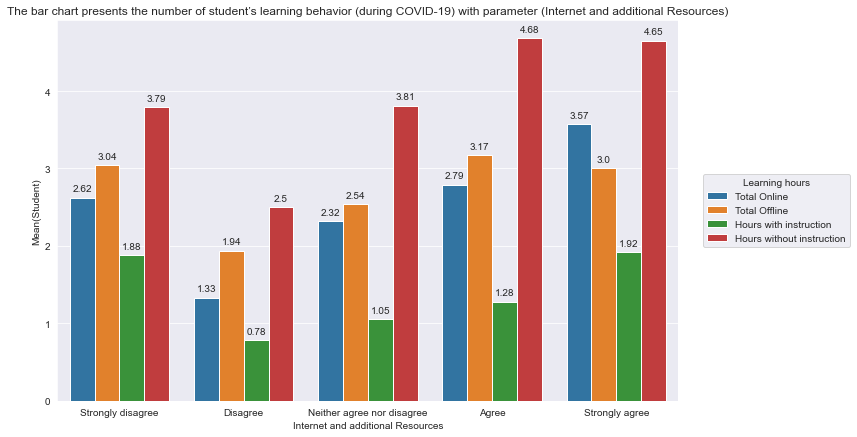

In [159]:
groupedBarPlot(datasetBasedResource,
               plotParams={
                   "x": "eff_resource",
                   "y": "Mean",
                   "hue": "Learning hours",
                   "title": "The bar chart presents the number of student’s learning behavior (during COVID-19) with parameter (Internet and additional Resources)",
                   "xLabel": "Internet and additional Resources",
                   "yLabel": "Mean(Student)"
               },
               legendParams={
                   "location": "center left",
                   "title": "Learning hours"
               })